Step 1. Import Libraries and Read Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/refs/heads/master/Datasets/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2. Data Manipulation

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Step 3. Handling Missing Values

In [6]:
# select columns between 'Glucose' to 'BMI'
diabetes.loc[:,'Glucose':'BMI'] = diabetes.loc[:,'Glucose':'BMI'].replace(0, np.nan)

In [7]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
np.round(diabetes['Insulin'].mean())

156.0

In [10]:
diabetes['Insulin'].fillna(np.round(diabetes['Insulin'].mean()), inplace = True)

In [11]:
from sklearn.impute import SimpleImputer
# strategy = "mean", "median", "most_frequent"
impute = SimpleImputer(strategy = 'median')

In [12]:
impute.fit(diabetes)

SimpleImputer(strategy='median')

In [14]:
diabetes_array = impute.transform(diabetes)
diabetes_array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [15]:
diabetes_df = pd.DataFrame(diabetes_array, columns = diabetes.columns)

In [16]:
diabetes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Step 4. Is there any Imabalanced Class Sample

In [17]:
diabetes_df['Outcome'] = diabetes_df['Outcome'].astype('int')

In [18]:
diabetes_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Step 5. Prepare Data for Classification

In [19]:
X = diabetes_df.drop(['Outcome'], axis = 1)
Y = diabetes_df['Outcome']

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
# SMOTE uses KNN (K-Nearest Neighbour)
transformed_feature, transformed_label = oversample.fit_resample(X,Y)

In [21]:
transformed_label.value_counts()

,count
Outcome,
1,500
0,500


Step 6. Split Train & Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_feature, transformed_label, test_size = 0.2, random_state = 0)

Step 7. Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
# solver = 'liblinear' (Binary Classification), 'lbfgs' (default), 'newton-cg',
# iteration = 1e5 (10000), penalty = To avoid overfitting of model (L1, L2)
logit_model = LogisticRegression(solver = 'liblinear',max_iter = 10000, penalty = 'l2')

In [28]:
logit_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [29]:
# score = Accuracy
logit_model.score(x_test, y_test)

0.805

Step 8. Classification Metrics

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
y_pred = logit_model.predict(x_test)

In [32]:
# diagonal values are correct predictions and non-diagonal are false prediction
confusion_matrix(y_test, y_pred)

array([[83, 22],
       [17, 78]])

<Axes: >

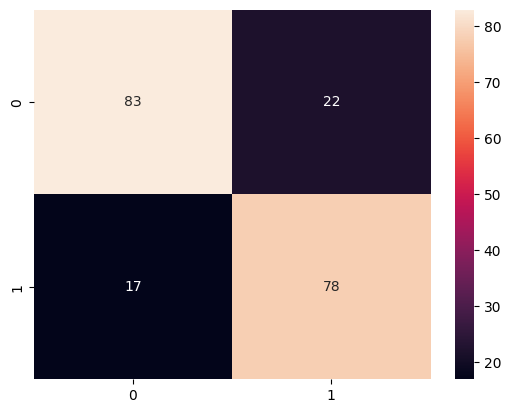

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.78      0.82      0.80        95

    accuracy                           0.81       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

